# Bifurcation and Hysteresis
## October 27th, 2022
### Overview: Solving and plotting solutions to ODEs with different initial conditions which lead to bifurcation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [2]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
            
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return lmbda*x - x**3

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20,10) #make plots big

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(5, -5, 500),  np.sqrt(5), F)
C3, X3 = EmbeddingAlg(np.linspace(5, -5, 500), -np.sqrt(5), F)

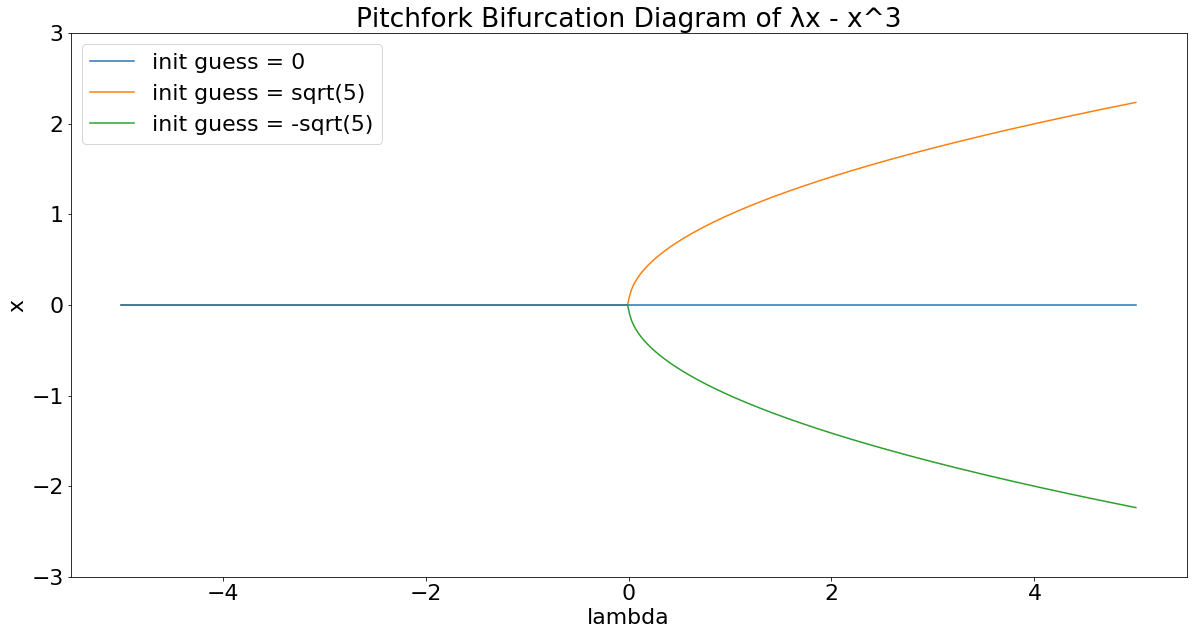

In [3]:
#plot the curves
plt.plot(C1,X1,zorder=3,label='init guess = 0')
plt.plot(C2,X2,zorder=2,label='init guess = sqrt(5)')
plt.plot(C3,X3,zorder=1,label='init guess = -sqrt(5)')
plt.title('Pitchfork Bifurcation Diagram of λx - x^3')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('x')
plt.ylim(-3,3)
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

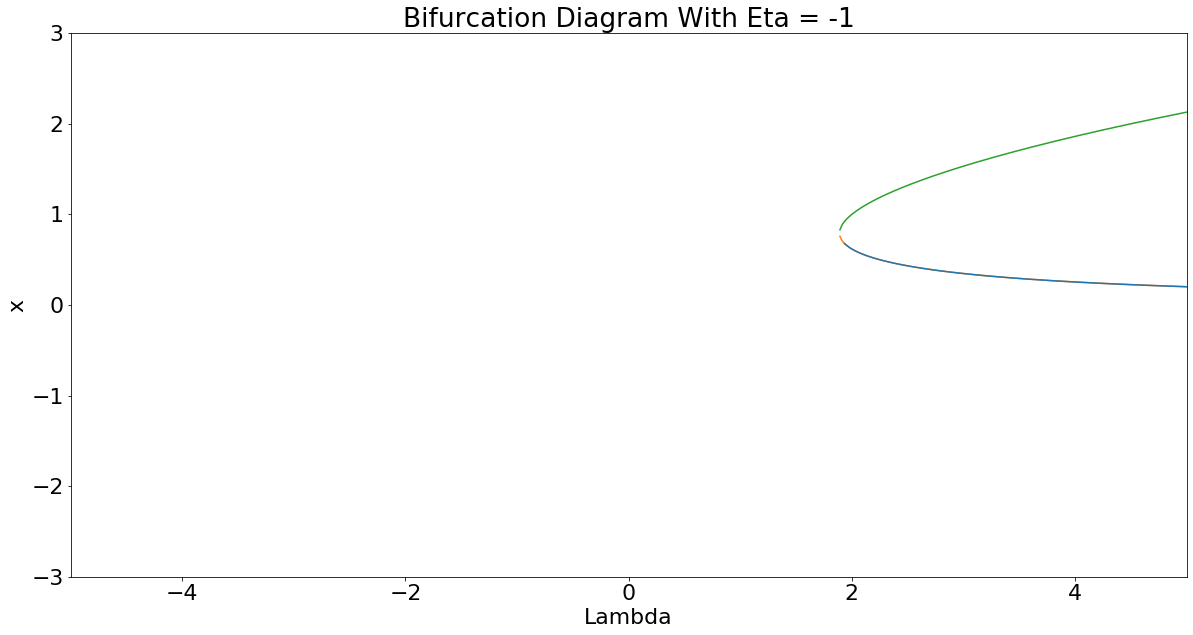

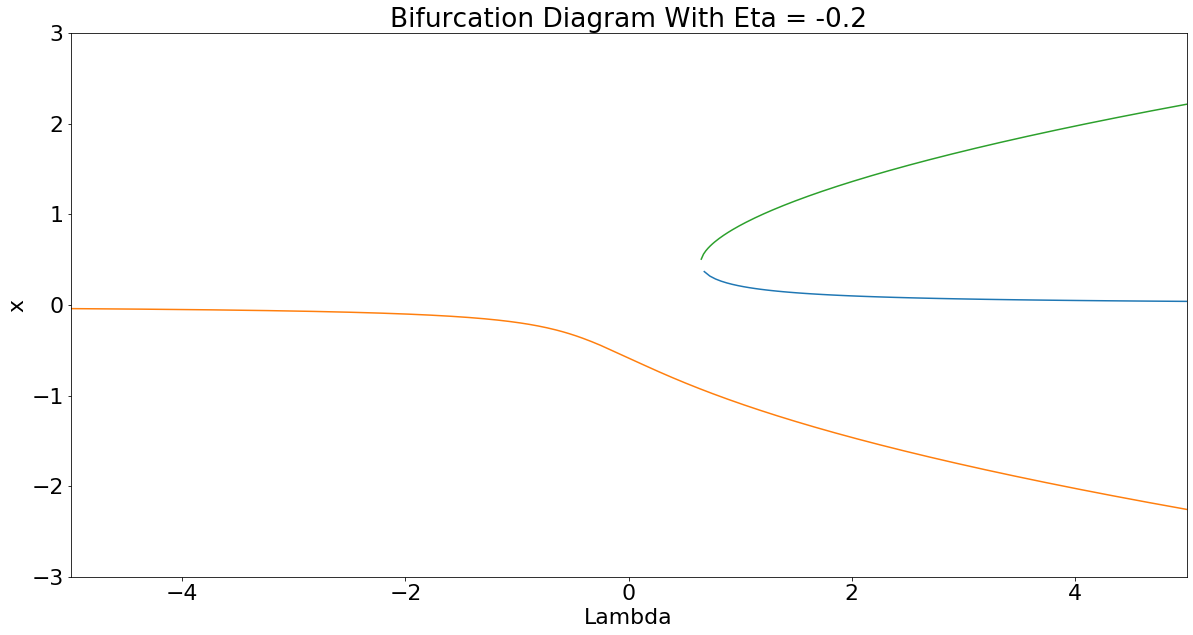

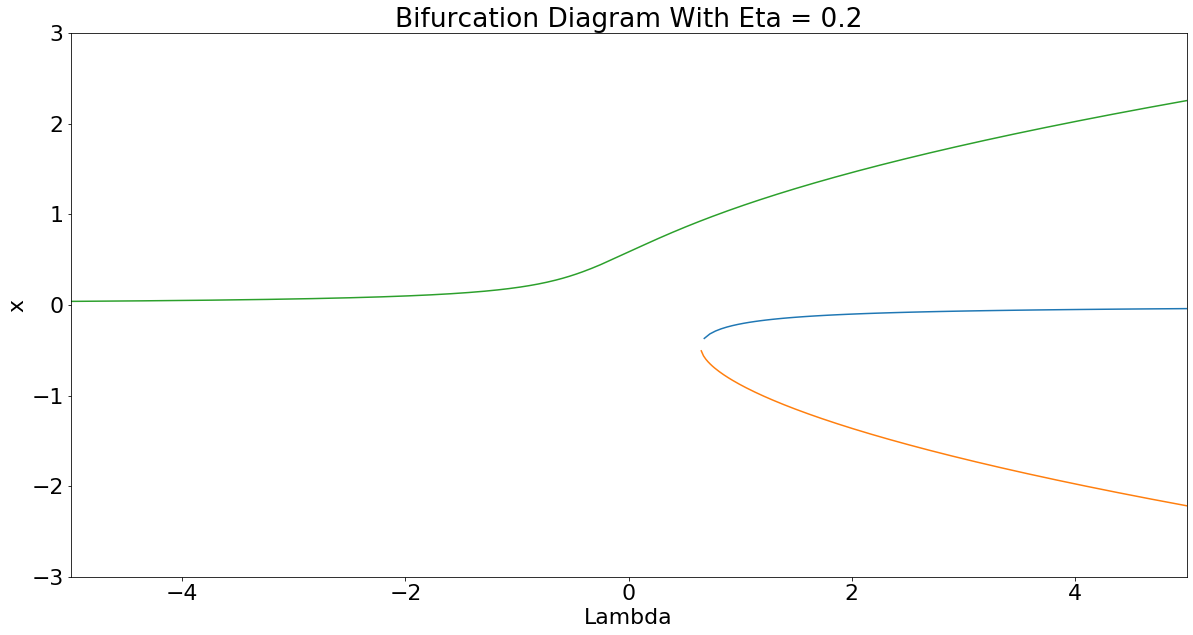

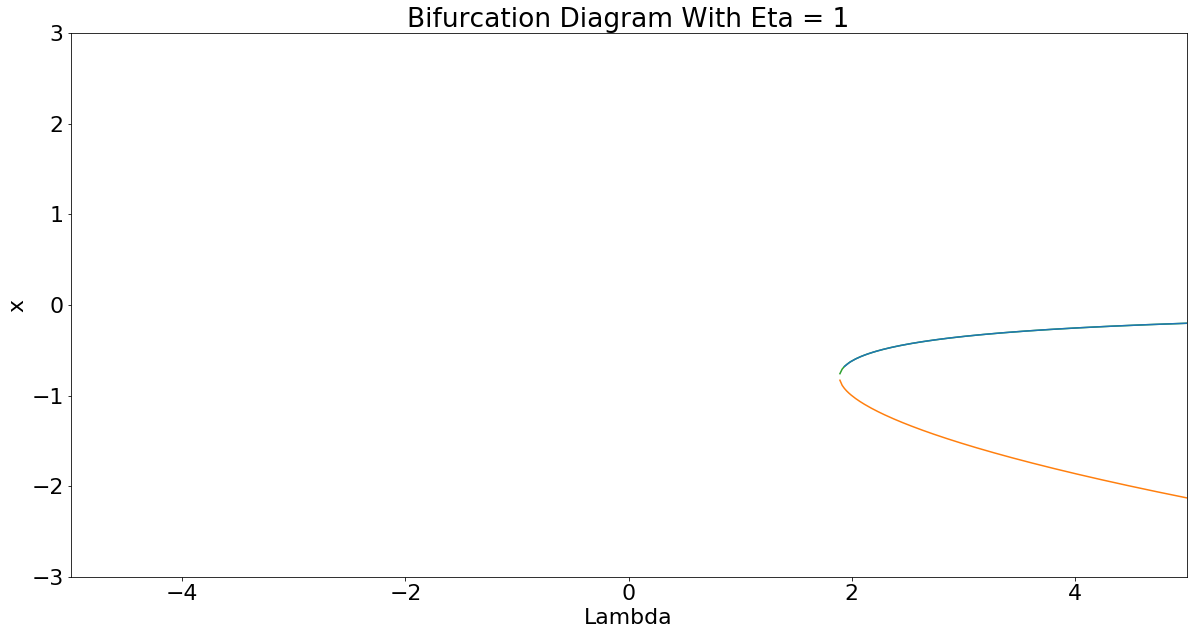

In [4]:
#define each function with a different eta
def F1(x, lmbda):
    return lmbda*x - x**3 - 1
def F2(x, lmbda):
    return lmbda*x - x**3 - 0.2
def F3(x, lmbda):
    return lmbda*x - x**3 + 0.2
def F4(x, lmbda):
    return lmbda*x - x**3 + 1

#list of etas and respective functions
etas = [-1,-0.2,0.2,1]
Fs = [F1,F2,F3,F4]

#for each pair, graph
for eta,F in zip(etas,Fs):
    C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)
    C2, X2 = EmbeddingAlg(np.linspace(5, -5, 500),  1.1, F)
    C3, X3 = EmbeddingAlg(np.linspace(5, -5, 500), -1.1, F)
    plt.plot(C1,X1,zorder=3)
    plt.plot(C2,X2,zorder=2)
    plt.plot(C3,X3,zorder=1)
    plt.title('Bifurcation Diagram With Eta = '+str(eta))
    plt.ylim(-3,3)
    plt.xlim(-5,5)
    plt.xlabel('Lambda')
    plt.ylabel('x')
    plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the follow differential equation describing a population of budworm:

dx/dτ = rx(1 − x/k) −x^2/(1 + x^2),

where r = 0.56

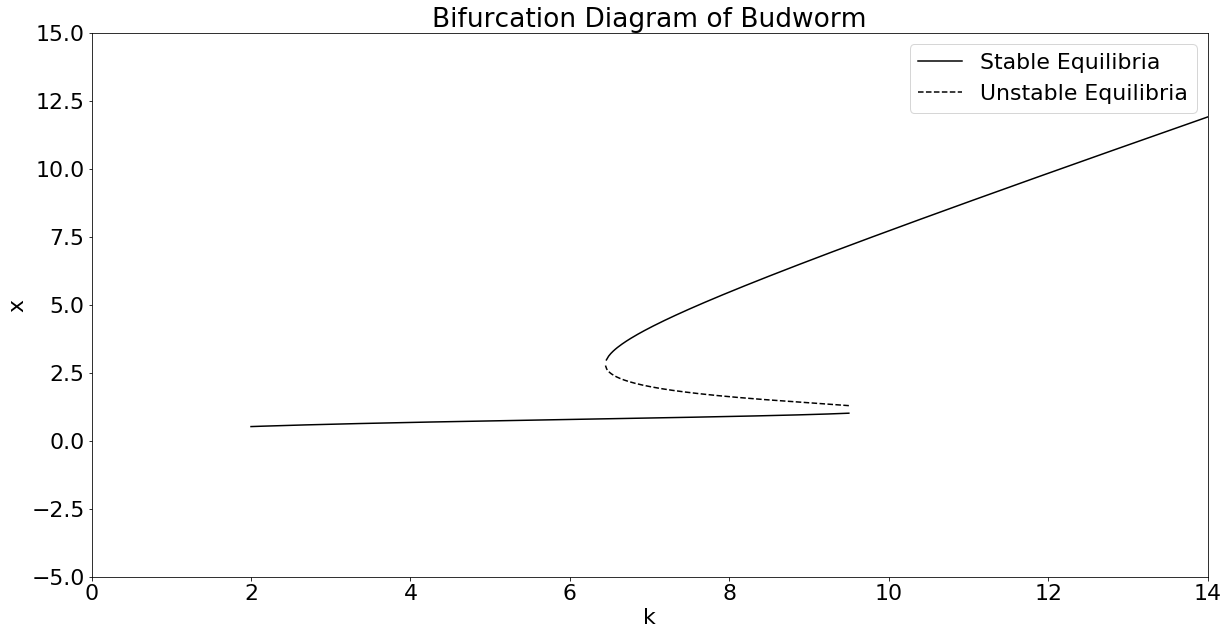

In [5]:
r = 0.56
#try k = 8 since it has 3 equilibrium solutions
F = lambda x,k: r*x*(1-(x/k)) - (x**2)/(1+x**2)

#some linspaces that work
x2 = np.linspace(9.5,2,200)
x3 = np.linspace(9.5,6.4,200)

#making curves
C1, X1 = EmbeddingAlg(np.linspace(14, 0.01, 500),  8, F)
C2, X2 = EmbeddingAlg(x2,  1, F)
C3, X3 = EmbeddingAlg(x3,  3, F)

#plotting
plt.plot(C1,X1,'k',label='Stable Equilibria')
plt.plot(C2,X2,'k')
plt.plot(C3,X3,'--k',label='Unstable Equilibria')
plt.xlabel('k')
plt.ylabel('x')
plt.title("Bifurcation Diagram of Budworm")
plt.legend()
plt.xlim(0,14)
plt.ylim(-5,15)
plt.show()